# Simplified Multi-Domain Assessment

Intention of this section is to assess the usefulness of *non prioritised* weighting in multi domain assessment. Effectively applying MTMF with individual / subsets of metrics across domains. 

## 1-Metric Matrix

$$
H = [H_0, H_1, \cdots, H_M]^T = 
\left[ 
\begin{array}{cccc}
1 & 0 & \cdots  & 0 \\
0 & 1 & \cdots  & 0 \\
0 & 0 & \cdots  & 1
\end{array}
\right]$$

$$ \begin{align}
  \Delta T_{ix} &= \frac{\sum_{j\neq x}\left( \overline{T_{i,j}}^{\forall t}\right)}{N-1} \\
  \Delta T_{ix}^- &= \frac{\sum_{j\neq x} \Delta T_{ij}}{N-1}
\end{align}
$$

The Performance ($P$) and False Positive Performance ($P^-$) of the system can then be described as

$$ H . 
\left[
\begin{array}{c}
\Delta T_{ix}^0 \\
\Delta T_{ix}^1 \\
\cdots \\
\Delta T_{ix}^M
\end{array}
\right] = P$$

Results generated using Combined Comparisons Run with `max_emphasis` of 2 and `max_sum` of 1

In [1]:
%matplotlib inline
import os

import pandas as pd
import itertools
from collections import defaultdict
import bounos.Analyses.Weight as Weight


observer = 'Bravo'
target = 'Alfa'
n_nodes = 6
n_metrics = 9

results_path = "/home/bolster/src/aietes/results/Malicious Behaviour Trust Control-2016-02-25-13-38-42"
outlier_path = os.path.join(results_path, "outliers.h5")


## Machine Learning Discussion

From a machine learning perspective, the challenge with MLing this classification / regression is language. 

In the below headed DataFrame, the "Metrics" can be considered ML "Features", with the "Var" being the "Label (or target)". But it's not that simple; as these labels only apply in the case of the relationships between $N_{i, i\neq0}$ and $N_0$ (where $N_0$ is the malicious node).

As such it doesn't make sense to use the raw metric results as ML training data. Rather using the grey-weighted value with singular / basic weights (i.e. no non binary prioritisation)

In [2]:
with pd.get_store(results_path + '.h5') as store:
    tf = store.trust
    tx = store.tx
    acc = store.trust_accessories

In [3]:
#tx[tx.ID.str.contains('_')]
tf.PLR

var                              run  observer  t   target 
CombinedBadMouthingPowerControl  0    Alfa      1   Alfa      NaN
                                                    Bravo       0
                                                    Charlie     0
                                                    Delta       0
                                                    Echo        0
                                                    Foxtrot     0
                                                2   Alfa      NaN
                                                    Bravo       0
                                                    Charlie     0
                                                    Delta       0
                                                    Echo        0
                                                    Foxtrot     0
                                                3   Alfa      NaN
                                                    Bravo       0
                

In [4]:
outlier_weights = Weight.build_outlier_weights(outlier_path, observer=observer, target=target, 
                                        n_metrics=n_metrics, signed=False)

outlier_weights.sort_index()

/CombinedTrust_0_4
/CombinedTrust_1_4
/CombinedTrust_2_4
/CombinedTrust_3_4


/home/bolster/src/aietes/src/aietes/Tools/__init__.py:1199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[obj_key] = df[obj_key].astype('category')


var                                                             CombinedBadMouthingPowerControl  \
ADelay ARXP ATXP RXThroughput PLR TXThroughput INDD INHD Speed                                    
0      0    0    0            0   0            0    0    1                             1.536689   
                                                         1                             2.678020   
                                                         1                             5.093316   
                                                         1                             3.228756   
                                                    1    0                             1.214175   
                                                         0                             1.331672   
                                                         0                             5.600897   
                                                         0                             0.873078   
                                               1    0    0                             0.940407   
                                                         0                             3.212840   
                                                         0                             2.556087   
                                                         0                             1.691036   
                                  1            0    0    0                             1.565171   
                                                         0                             0.875971   
                                                         0                             2.040387   
                                                         0                             0.741897   
                 1            0   0            0    0    0                             1.000976   
                                                         0                             1.150225   
                                                         0                             1.377230   
                                                         0                             0.749230   
            1    0            0   0            0    0    0                            14.500000   
                                                         0                            14.000000   
                                                         0                            14.500000   
                                                         0                            14.500000   
       1    0    0            0   0            0    0    0                             2.835919   
                                                         0                             0.325720   
                                                         0                            10.837542   
                                                         0                             0.593956   
1      0    0    0            0   0            0    0    0                             1.531012   
                                                         0                             1.449570   
                                                         0                             0.636476   
                                                         0                             1.639101   

var                                                             CombinedSelfishTargetSelection  \
ADelay ARXP ATXP RXThroughput PLR TXThroughput INDD INHD Speed                                   
0      0    0    0            0   0            0    0    1                            1.196526   
                                                         1                            4.974364   
                                                         1                            5.699470   
                                                         1                            1.363624   
                                             

In [5]:
metric_keys = list(outlier_weights.index.names)
var_keys = list(outlier_weights.keys())
X = pd.DataFrame(outlier_weights.groupby(level=metric_keys).mean().to_records())[metric_keys].astype(int)
Y = pd.DataFrame(outlier_weights.groupby(level=metric_keys).mean().to_records())[var_keys]
outlier_weights.stack(level='var')

ADelay  ARXP  ATXP  RXThroughput  PLR  TXThroughput  INDD  INHD  Speed  var                            
0       0     0     0             0    0             0     0     1      CombinedBadMouthingPowerControl     1.536689
                                                                        CombinedSelfishTargetSelection      1.196526
                                                                        CombinedTrust                       1.709057
                                                                        Shadow                              2.058487
                                                                        SlowCoach                           5.090524
                                                                        CombinedBadMouthingPowerControl     2.678020
                                                                        CombinedSelfishTargetSelection      4.974364
                                                                        Combi

In [6]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)

In [7]:
svm.fit()

TypeError: fit() takes at least 3 arguments (1 given)

In [ ]:
len(np.packbits(X.values.astype(int).T))

In [ ]:
Y.shape

In [ ]:
Y['metric']=map(lambda x: [metric_keys[i] for i,v in enumerate(x) if v], X.values)

In [ ]:
Y

# Cohort Based Outlier Assessment

Previous versions of the outlier assessment methodology use the comparison between a known "good" behaviour and a known "malicious" behaviour run, and 

In [10]:
with pd.get_store(results_path + '.h5') as store:
    trust_frame = store.trust
    tx = store.tx
    acc = store.trust_accessories

In [17]:
# Extract trust metric names from frame
verbose=True
min_emphasis=0
max_emphasis=2
min_sum=1
max_sum=1
good="CombinedTrust"
trust_metrics = list(trust_frame.keys())
if verbose:
    print("Using {0} Trust Metrics".format(trust_metrics))

if max_emphasis - min_emphasis < 2:
    raise RuntimeError("Setting Max Emphasis <2 is pointless; Runs all Zeros")
    
if max_sum is None:
    max_sum = np.inf

combinations = itertools.ifilter(np.any,
                                 itertools.product(
                                     xrange(
                                         min_emphasis, max_emphasis
                                     ), repeat=len(trust_metrics)
                                 )
                                 )
combinations = itertools.ifilter(lambda v: min_sum <= np.sum(v) <= max_sum,
                                 combinations)
combinations = sorted(combinations, key=lambda l: sum(map(abs, l)))



Using ['ADelay', 'ARXP', 'ATXP', 'RXThroughput', 'PLR', 'TXThroughput', 'INDD', 'INHD', 'Speed'] Trust Metrics


In [51]:
from bounos.Analyses.Weight import generate_run_comparative_outlier_tp, norm_weight
from bounos.Analyses.Trust import generate_node_trust_perspective
outliers = []
#for i, w in enumerate(combinations):
#_w = norm_weight(w, trust_metrics)
_w = norm_weight([-.03,.1,.495,.03,-.03,.06,-.047,-.039,-.1], trust_metrics)
#if verbose: print(strftime("%Y-%m-%d %H:%M:%S", gmtime()), i, _w)

weighted_trust_perspectives = generate_node_trust_perspective(trust_frame,
                                                                    flip_metrics=[],
                                                                    metric_weights=_w,
                                                                    par=False)
l_outliers = []
for i, tf in weighted_trust_perspectives.groupby(level=['run', 'observer']):
    l_outliers.append(generate_run_comparative_outlier_tp(tf, good=good, good_lvl='var'))
outlier = pd.concat(l_outliers).sort_index().dropna(how='all').reset_index()
for k in _w.keys():
    outlier[k] = _w[k]
outlier.set_index(['var', 't'], inplace=True)
outliers.append(outlier)
#break

Populating the interactive namespace from numpy and matplotlib


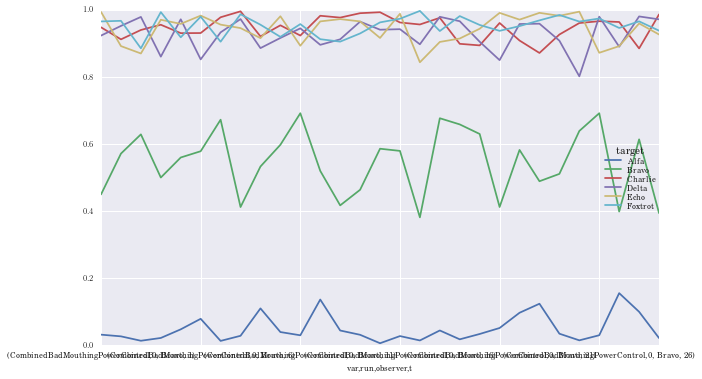

In [134]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

wtp=weighted_trust_perspectives.xs('CombinedBadMouthingPowerControl', level='var', drop_level=False)\
                            .xs(0, level='run', drop_level=False).xs('Bravo',level='observer', drop_level=False)
wtp.plot()


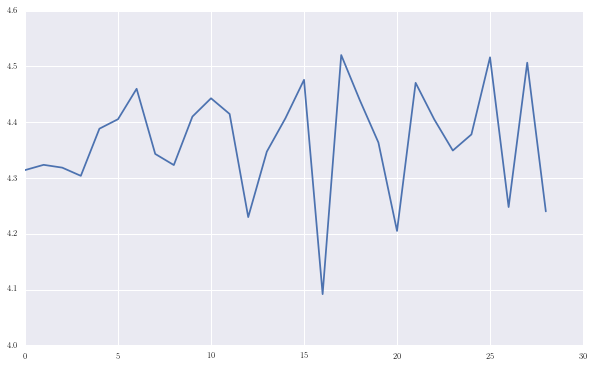

In [135]:
plot(wtp.values.sum(axis=1))

In [160]:

def mean_t_delta(result, target_col=0):
    
    target = result.values[:,target_col]
    cohort = np.delete(result.values, target_col, axis=1)
    #This is geometrically equivalant to doing a time-series mean (i.e. (np.mean(cohort, axis=1)-target).mean())
    return np.subtract(np.mean(cohort),target).mean()

In [161]:
wtp.groupby(level=['var','run','observer'])\
.apply(mean_t_delta)

var                              run  observer
CombinedBadMouthingPowerControl  0    Bravo       0.815546
dtype: float64

In [138]:
wtp.values[0], wtp.values[~0]

(array([ 0.031,  0.45 ,  0.949,  0.924,  0.995,  0.966]),
 array([ 0.021,  0.394,  0.987,  0.973,  0.927,  0.939]))

In [139]:

target = wtp.values[:,1]weighted_trust_perspectives
cohort = np.delete(wtp.values, 1, axis=1)
target, cohort

(array([ 0.45 ,  0.572,  0.629,  0.5  ,  0.56 ,  0.579,  0.673,  0.412,
         0.533,  0.598,  0.692,  0.52 ,  0.417,  0.463,  0.586,  0.58 ,
         0.381,  0.677,  0.659,  0.63 ,  0.412,  0.582,  0.489,  0.511,
         0.639,  0.692,  0.398,  0.614,  0.394]),
 array([[ 0.031,  0.949,  0.924,  0.995,  0.966],
        [ 0.026,  0.913,  0.953,  0.893,  0.968],
        [ 0.013,  0.941,  0.98 ,  0.871,  0.886],
        [ 0.021,  0.956,  0.861,  0.971,  0.994],
        [ 0.047,  0.931,  0.973,  0.959,  0.919],
        [ 0.078,  0.932,  0.853,  0.984,  0.98 ],
        [ 0.012,  0.979,  0.934,  0.957,  0.906],
        [ 0.027,  0.996,  0.973,  0.946,  0.988],
        [ 0.109,  0.922,  0.887,  0.916,  0.956],
        [ 0.039,  0.955,  0.917,  0.982,  0.92 ],
        [ 0.029,  0.924,  0.946,  0.894,  0.958],
        [ 0.136,  0.983,  0.896,  0.966,  0.913],
        [ 0.043,  0.978,  0.913,  0.973,  0.906],
        [ 0.03 ,  0.991,  0.966,  0.966,  0.93 ],
        [ 0.005,  0.994,  0.942,  

In [158]:
%timeit (np.mean(cohort, axis=1)-target).mean()

The slowest run took 10.34 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 13.5 µs per loop


In [159]:
%timeit np.subtract(np.mean(cohort),target).mean()

The slowest run took 7.49 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 11.2 µs per loop


In [182]:
l_outliers = []
for i, tf in weighted_trust_perspectives.groupby(level=['var', 'run', 'observer']):
    tf=tf.drop(i[-1], axis=1) #Drop observer from MDT calc
    l_outliers.append((i, mean_t_delta(tf, target_col=0)))
outlier = pd.Series(dict(l_outliers))
outlier.index.names = ['var', 'run', 'observer']
outlier = outlier.sort_index().dropna(how='all').reset_index()
for k in _w.keys():
    outlier[k] = _w[k]
#outlier.set_index(['var'], inplace=True)


In [183]:
outlier.where(outlier.observer != 'Alfa').dropna(how='all').groupby('var')[0].mean()

var
CombinedBadMouthingPowerControl    0.899911
CombinedSelfishTargetSelection     0.016914
CombinedTrust                     -0.007838
Shadow                             0.060407
SlowCoach                          0.058087
Name: 0, dtype: float64

In [188]:
weighted_trust_perspectives.columns.tolist().index('Alfa')

[autoreload of bounos.Analyses.Weight failed: Traceback (most recent call last):
  File "/home/bolster/anaconda2/envs/py2/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "/home/bolster/src/aietes/src/bounos/Analyses/Weight.py", line 230
    target_col =
                ^
SyntaxError: invalid syntax
]


ValueError: 'Alfa' is not in list

In [192]:
from bounos.Analyses.Weight import generate_mean_t_delta_frame
mdt_frame = generate_mean_t_delta_frame(trust_frame, _w, target='Alfa')

In [198]:
mdt_frame.where(mdt_frame.observer != 'Alfa').dropna(how='all').groupby(level='var')[0].mean()

var
CombinedBadMouthingPowerControl    0.899911
CombinedSelfishTargetSelection     0.016914
CombinedTrust                     -0.007838
Shadow                             0.060407
SlowCoach                          0.058087
Name: 0, dtype: float64

In [224]:
def generate_mean_delta_t(path):
    with pd.get_store(path + '.h5') as store:
        trust_frame = store.trust

    outliers = Weight.perform_weight_factor_target_mean_t_delta_analysis_on_trust_frame(trust_frame, min_emphasis=0,
                                                                                        max_emphasis=2, max_sum=1,
                                                                                        verbose=False, par=True)
    outliers.to_hdf(os.path.join(path, "outliers.h5"),
                "{0}".format("meandelta"))
    return outliers

In [225]:
outliers = generate_mean_delta_t(results_path)

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  10 out of   9 | elapsed:    8.5s remaining:   -0.9s
[Parallel(n_jobs=-1)]: Done  10 out of   9 | elapsed:    8.9s remaining:   -0.9s
[Parallel(n_jobs=-1)]: Done  10 out of   9 | elapsed:    9.0s remaining:   -0.9s
[Parallel(n_jobs=-1)]: Done  10 out of   9 | elapsed:    9.1s remaining:   -0.9s
[Parallel(n_jobs=-1)]: Done  10 out of   9 | elapsed:    9.2s remaining:   -0.9s
[Parallel(n_jobs=-1)]: Done  10 out of   9 | elapsed:    9.3s remaining:   -0.9s
[Parallel(n_jobs=-1)]: Done  10 out of   9 | elapsed:    9.7s remaining:   -1.0s
[Parallel(n_jobs=-1)]: Done  10 out of   9 | elapsed:   13.7s remaining:   -1.4s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   13.7s finished


In [226]:
key_order = ['ADelay', 'ARXP', 'ATXP', 'RXThroughput', 'TXThroughput', 'PLR', 'INDD', 'INHD', 'Speed']

outliers.reset_index()
outliers.set_index(key_order, inplace=True)
outliers.sort_index(inplace= True)
outliers

var  \
ADelay ARXP ATXP RXThroughput TXThroughput PLR INDD INHD Speed                                    
0      0    0    0            0            0   0    0    1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1      CombinedBadMouthingPowerControl   
                                                         1       CombinedSelfishTargetSelection   
                                                         1       CombinedSelfishTargetSelection   
                                                         1       CombinedSelfishTargetSelection   
                                                         1       CombinedSelfishTargetSelection   
                                                         1       CombinedSelfishTargetSelection   
                                                         1       CombinedSelfishTargetSelection   
...                                                                                         ...   
1      0    0    0            0            0   0    0    0                               Shadow   
                                                         0                               Shadow   
                                                         0                               Shadow   
                                                         0                               Shadow   
                                                         0                               Shadow   
                                                         0                               Shadow   
                                                         0                            SlowCoach   
                                                         0                            SlowCoach   
                                 

In [242]:
mdt_ws=pd.DataFrame({v: g.groupby(level=key_order)[0].mean() for v,g in outliers.groupby('var')})

In [244]:
mdt_ws

CombinedBadMouthingPowerControl  \
ADelay ARXP ATXP RXThroughput TXThroughput PLR INDD INHD Speed                                    
0      0    0    0            0            0   0    0    1                            -0.026931   
                                                    1    0                             0.002413   
                                               1    0    0                            -0.008162   
                                           1   0    0    0                             0.000000   
                              1            0   0    0    0                            -0.010105   
                 1            0            0   0    0    0                            -0.002986   
            1    0            0            0   0    0    0                             0.825489   
       1    0    0            0            0   0    0    0                             0.744115   
1      0    0    0            0            0   0    0    0                            -0.037805   

                                                                CombinedSelfishTargetSelection  \
ADelay ARXP ATXP RXThroughput TXThroughput PLR INDD INHD Speed                                   
0      0    0    0            0            0   0    0    1                            0.031392   
                                                    1    0                            0.005315   
                                               1    0    0                           -0.054880   
                                           1   0    0    0                            0.000000   
                              1            0   0    0    0                            0.029222   
                 1            0            0   0    0    0                            0.019382   
            1    0            0            0   0    0    0                            0.000000   
       1    0    0            0            0   0    0    0                            0.047640   
1      0    0    0            0            0   0    0    0                           -0.047372   

                                                                CombinedTrust  \
ADelay ARXP ATXP RXThroughput TXThroughput PLR INDD INHD Speed                  
0      0    0    0            0            0   0    0    1          -0.026050   
                                                    1    0          -0.051460   
                                               1    0    0           0.007941   
                                           1   0    0    0           0.000000   
                              1            0   0    0    0           0.009604   
                 1            0            0   0    0    0          -0.000126   
            1    0            0            0   0    0    0           0.000000   
       1    0    0            0            0   0    0    0          -0.035506   
1      0    0    0            0            0   0    0    0          -0.012500   

                                                                  Shadow  \
ADelay ARXP ATXP RXThroughput TXThroughput PLR INDD INHD Speed             
0      0    0    0            0            0   0    0    1     -0.065405   
                                                    1    0     -0.067185   
                                               1    0    0     -0.335487   
                                           1   0    0    0      0.000000   
                              1            0   0    0    0      0.000311   
                 1            0            0   0    0    0     -0.004866   
            1    0            0            0   0    0    0      0.000000   
       1    0    0            0            0   0    0    0      0.319656   
1      0    0    0            0            0   0    0    0     -0.017803   

                                                                SlowCoach  
ADelay ARXP ATXP RXThroughput TXThroughput PLR INDD INHD Speed             
0      0    0 

In [234]:
_d.keys()

['CombinedTrust',
 'Shadow',
 'CombinedBadMouthingPowerControl',
 'SlowCoach',
 'CombinedSelfishTargetSelection']